<a href="https://colab.research.google.com/github/whdrns2013/Workspace_SeSSAC/blob/main/pythonDir/06_deeplearning/dl_01_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숙제
* keras.util 살펴보기 (to_categorical...)
* 기타 정리 안된 내용들 넣기
* 12/12 의류 품목 인식 - 두 모델 비교하기 - 그래프 그리기 공부
* Image 라이브러리 공부
* 12/12 실습 -> 의류 품목 인식 및 보스턴 주택 가격 -> 실습 게시물로 올리기
* 보스턴 주택 가격 예측 다시 보기

# 완료한 숙제
* 구글 코랩 단축키
* 딥러닝이 사용되는 곳은?
* 학습률에 대한 공부 : 정의와 의의
* 활성화 함수 종류와 그 의미 공부  https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800   
* 활성화 함수 중 softmax는 조금 다른 시각으로 봐야 할 것 같은데.. 살펴보기  
* 옵티마이저 의 개념과 종류, 각 종류별 상이점 확인 : https://heeya-stupidbutstudying.tistory.com/entry/ML-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%97%90%EC%84%9C%EC%9D%98-Optimizer-%EC%97%AD%ED%95%A0%EA%B3%BC-%EC%A2%85%EB%A5%98
* 왜 숫자값을 원핫 인코딩으로 변환하는걸까? - 신경망 만들어보기 부분 
* OR, NAND, XOR 에 대한 설명 (하단 URL 있음)  

# 넘긴 숙제
* 모델에서 층을 만들 때, Dense 말고 또 무엇이 있지??

# 딥러닝 수업 전 설명  
  
* 교재 : 백견불여일타  
* 환경 : 구글 코랩  
* 사용법 : 대부분 주피터 랩과 비슷하나, 단축키 부분은 조금 다름  
* 주의사항 : 런타임 -> 런타임 유형 -> GPU는 6~8시간 사용 후 24시간 대기  
* 때문에 불필요한 GPU 세션 연결은 지양  

## 구글 코랩
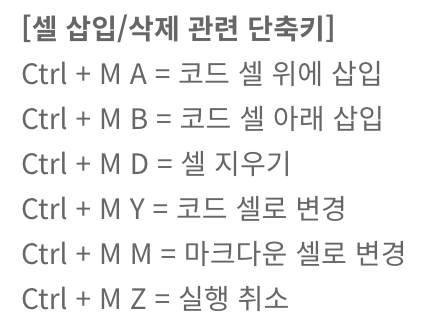

# 케라스  
  
* 파이썬 기반 머신러닝 라이브러리  
* 텐서플로우를 편하게 사용할 수 있도록 보조하는 역할  
* 텐서플로우 사용은 거의 모두 케라스를 통해 사용한다고 해도 과언이 아님  
(1) 높은 유연성  
(2) 명확한 예약어명으로 쉬운 사용  
... 등등의 장점  

In [ ]:
pwd
# 현재 디렉토리

'/content'

In [ ]:
# 판다스 임포트 해보기 = 주피터와 동일
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/칼럼 리스트.csv', encoding='cp949')

In [ ]:
data

,Unnamed: 0,0,칼럼명,칼럼 데이터타입
0,0,행정동코드,행정동코드,int64
1,1,자치구,자치구,object
2,2,행정동,행정동,object
3,3,성별,성별,int64
4,4,연령대,연령대,int64
...,...,...,...,...
138,138,배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용 미추정 인구수,int64
139,139,배달_식재료 서비스 사용일수,배달_식재료 서비스 사용일수,float64
140,140,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 25%",float64
141,141,"배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 50%",float64


In [ ]:
# 파이썬 버전 보기
import sys
sys.version

'3.8.16 (default, Dec  7 2022, 01:12:13) \n[GCC 7.5.0]'

In [ ]:
# 텐서플로우 임포트, 버전 보기
import tensorflow as tf
tf.__version__

'2.9.2'

# 딥러닝 개요  
  
* 딥러닝은 문제 정의 -> 데이터 준비 -> 학습, 튜닝의 반복이다.

> <b>문제 정의</b>  
> 가장 중요한 것은 문제 정의이다.  
> 어떤 문제인지, 다루는 데이터의 유형은 어떠한지 등  
> 이러한 준비들이 되어야 명확한 처리가 가능  
  
> <b>학습 하기</b>  
> 선택한 모델이 현 문제에 어울리는 모델인지  
> 손실함수와 los는 어떻게 할 것인지 등..
> 에 대한 파악 필요  
  
> <b>추론 및 평가</b>  
> 이후 학습한 모델에 대한 평가 필요  
  
## 딥러닝 용어  
> <b>데이터 준비하기</b>  
> * 클래스 불균형 : 은행 거래 사기, 희귀질병 등. 클래스간 자료 양이 불균형이 있는 경우  
> * under sampling : 과소 표집. 클래스 불균형에서 작은 쪽의 클래스의 데이터양에 양을 맞추는 것.  
> * over sampling : 과대 표집. 클래스 불균형에서 큰 쪽의 클래스의 데이터양에 맞추는 것.  
  
> <b>모델 학습</b>  
> * 분류 :  
> * 회귀 :  
> * 이진 분류 : 타겟의 범주가 두 가지인 분류의 형태 (선택은 하나)  
> * 다중 분류 : 타겟의 범주가 여러 개인 분류의 형태 (선택은 하나)  
> * 다중 레이블 분류 :  타겟의 범주가 여러개이고, 선택 또한 여러개 하는 경우.

> <b>전처리, 파라미터</b>  
> * 원핫 인코딩 : 수치형이 아닌 자료를 수치형으로 표시하는 인코딩 방법으로, 여러 개의 클래스를 각각 칼럼으로 잡은 후, 해당하면 1, 해당하지 않으면 0으로 표기하는 방법  
> * 레이블 인코딩 : 딥러닝에서는 일반적으로 레이블 인코딩은 지양한다. 레이블 인코딩시에는 모델이 인코딩 후 숫자값 크기에 영향을 받을 수 있기 때문.  
> * 하이퍼 파라미터 : 사람이 직접 설정해줘야 하는 파라미터 값. 학습률, 배치 크기, 에폭 등..  
> * 드롭아웃 : 고의로 학습데이터를 누락시키는 것. 과적합 방지를 위해 진행한다.  
  
> <b>에폭과 스텝</b>  
> * 에폭 : 전체 데이터를 사용해 학습하는 횟수. 전체 데이터를 1번 반복하면 1에폭임. 10회 반복은 10 에폭  

> <b>과대적합과 과소적합</b>  
> * 과대적합 : 훈련데이터에 너무 적합하게 모델이 만들어진 경우  
> * 과대적합은 드롭아웃 등을 통해 방지를 한다.
  
> 평가  
> * 정밀도, 정확도, F1스코어 등, 머신러닝에서 사용했던 평가 지표를 동일하게 사용한다.

## 기본 연산 해보기  
  
* 텐서플로우 : 텐서(다차원) 플로우(흐름)  - 다차원의 흐름.  
* 다차원이기 때문에 기본적으로 사용하기 어려우나,  
* 케라스의 지원을 통해 사용하기 쉬워졌음  
* 텐서플로우의 기본 자료형은 numpy의 배열 형태 (데이터타입은 다양할 수 있으나, 보통 인코딩 등을 통해 숫자로 사용함)   


In [ ]:
# 텐서플로우 임포트
import tensorflow as tf

In [ ]:
a = tf.constant(2)
print(a)
print(tf.rank(a))
# 0차원의 형태

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
b = tf.constant([1, 2])
print(tf.rank(b))
# 1차원의 형태

tf.Tensor(1, shape=(), dtype=int32)


## 신경망  

### 퍼셉트론  
![](https://heung-bae-lee.github.io/image/perceptron_basic.png)
* 신경망은 퍼셉트론 알고리즘으로부터 시작함  
* 퍼셉트론 알고리즘 : 여러 개의 입력 신호를 받아, 하나의 출력 신호로 출력하는 것.  
* x는 입력, y는 출력, w는 가중치.  
* 각각의 입력값 x들에 대해 가중치를 준 후, 활성화 함수를 통해 출력을 하거나 하지 않거나 한다.  
* 활성화함수 : 출력값을 다음으로 전달 할지 말지를 결정하는 함수로, 임계값으로 대표될 수 있다. 퍼셉트론에서 출력값이 임계값을 넘으면 전달되고, 넘지 않으면 전달되지 않는다.  
  
> <b>활성화 함수</b>  
> * 계단 함수 (step function): 단순히 0과 1을 출력하는 활성화 함수.  
  
> 인공신경망의 역사  
> https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html  

### 단층 퍼셉트론

In [ ]:
#Import

import tensorflow as tf # 텐서플로우
tf.random.set_seed(777) # 텐서플로우의 난수 생성 규칙 지정
import numpy as np # 넘파이
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense # Dense 완전 연결층
from keras.optimizers import SGD # 확률적 경사하강법
from keras.losses import mse # mean squared error 평가 지표

In [ ]:
from keras.models import 

In [ ]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [ ]:
# 데이터 만들기
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[1]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))
## Dense : 완전 연결층. 모든 입력값들에 대해 연결을 하는 층이다.
## 모델에 Dense 층 1개를 만들었고, 그 층에는 1개의 유닛(=뉴런)이 있다. (Dense(1))
## input shape 들어오는 값의 형태는 2, x 행렬의 형태 
## activation 활성화 함수 = linear  


# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])
## 컴파일에서는 옵티마이저, 로스, 평가 모듈을 정의한다.
## 옵티마이저는 경사하강법, : 옵티마이저는.. 모델의 학습 방법을 최적화하는 방법론. 딥러닝에서는 이를 선택할 수 있다. 
## 로스 측정은 mse 방식
## 평가 지표는 acc, 정확도


# 모델 학습
model.fit(x, y, epochs = 500)
## 에폭(학습 횟수)은 500
## 이 모델은 x1 * w1 _ x2 * w1 .... 형식으로 가중치 계산이 되었다.
## 우리는 x값은 알고 있으나, 학습 과정에서 생긴 w (weight = 가중치) 값은 모른다.

In [ ]:
# 가중치(weight와 편향bias 찾기)
model.get_weights()

## 결과값 :  [array([[0.49431458], [0.37552658]], dtype=float32), array([0.32719323], dtype=float32)]
## 가중치 -> 0.49431458, 0.37552658
## 편향 -> 0.32719323

[array([[0.49431458],
        [0.37552658]], dtype=float32), array([0.32719323], dtype=float32)]

In [ ]:
# 각 들어오는 학습 데이터에 대해,
# 모델에서 학습한 가중치와 편향을 직접 계산해보기

## (1) [0,0] 의 경우 -> 임계값(0.5) 못넘어 0이 됨
a = (0 * 0.49431458) + (0 * 0.37552658) + 0.32719323

## (2) [0,1] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
b = (0 * 0.49431458) + (1 * 0.37552658) + 0.32719323

## (3) [1, 0] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
c = (1 * 0.49431458) + (0 * 0.37552658) + 0.32719323

## (4) [1, 1] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
d = (1 * 0.49431458) + (1 * 0.37552658) + 0.32719323

print(a, b, c, d)

0.32719323 0.7027198100000001 0.82150781 1.19703439


In [ ]:
# OR 의 경우
# 데이터 만들기
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[1]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)

Metal device set to: Apple M2


2022-12-11 18:41:40.214224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 18:41:40.214297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/500


2022-12-11 18:41:40.609910: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 18:41:40.712810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 882ms/step - loss: 0.2282 - acc: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2224 - acc: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2170 - acc: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2118 - acc: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2070 - acc: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2024 - acc: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1980 - acc: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1940 - acc: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1901 - acc: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1865 - acc: 1.0000
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1830 - acc: 1.0

In [ ]:
model.get_weights()

[array([[0.5609935 ],
        [0.58792883]], dtype=float32),
 array([0.16167852], dtype=float32)]

In [ ]:
# NAND 의 경우
# NAND = NOT AND
# 데이터 만들기 !!!
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 130ms/step - loss: 1.0076 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9597 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9148 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8726 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8329 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7957 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7608 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7280 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6972 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6682 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.641

2022-12-11 18:52:35.455796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 7ms/step - loss: 0.4301 - acc: 0.2500
Epoch 23/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4171 - acc: 0.2500
Epoch 24/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4048 - acc: 0.2500
Epoch 25/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3931 - acc: 0.2500
Epoch 26/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3822 - acc: 0.2500
Epoch 27/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3719 - acc: 0.2500
Epoch 28/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3622 - acc: 0.2500
Epoch 29/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3530 - acc: 0.2500
Epoch 30/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3443 - acc: 0.2500
Epoch 31/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3361 - acc: 0.2500
Epoch 32/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3284 - ac

In [ ]:
model.get_weights()

[array([[-0.3768994],
        [-0.3686214]], dtype=float32),
 array([1.0990759], dtype=float32)]

In [ ]:
# XOR 의 경우
# exclusive or
# 데이터 만들기 !!!
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)
## 에폭(학습 횟수)은 500
## -> 정확도가 0.75가 나옴

model.fit(x, y, epochs = 1000)
## 학습 횟수를 늘렸으나, 정확도가 더욱 떨어짐 (0.5)
## 즉, 학습 횟수를 늘린다고 해서 정확도가 올라가지 않음
## 단층 퍼셉트론에서는 이와 같이 XOR에 대한 문제를 해결하지 못함

Epoch 1/500
1/1 [==============================] - 0s 130ms/step - loss: 0.3424 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3418 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3412 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3406 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3401 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3395 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3389 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3384 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3378 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3372 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.336

2022-12-11 18:58:04.588806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 5ms/step - loss: 0.3303 - acc: 0.2500
Epoch 24/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3298 - acc: 0.2500
Epoch 25/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3293 - acc: 0.2500
Epoch 26/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3288 - acc: 0.2500
Epoch 27/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3283 - acc: 0.2500
Epoch 28/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3278 - acc: 0.2500
Epoch 29/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3273 - acc: 0.2500
Epoch 30/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3269 - acc: 0.2500
Epoch 31/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3264 - acc: 0.2500
Epoch 32/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3259 - acc: 0.2500
Epoch 33/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3254 - ac

In [ ]:
model.get_weights()

[array([[0.0037272],
        [0.0037034]], dtype=float32),
 array([0.49559313], dtype=float32)]

OR, NAND, XOR 에 대한 설명

https://seahahn.tistory.com/96

### 다층 퍼셉트론

위에서 실습했다시피, XOR 논리에 대해서는 학습 정확도가 떨어지며,  
학습 횟수를 늘린다고 해서 해결되지 않음을 알 수 있었다.  

이 때문에 1900년대 중반 인공신경망의 연구는 암흑기를 맞이했다.  
  
이후 layer를 여러 개로 주는 '다층 퍼셉트론' 기술이 대두되었으며,  
이 다층 퍼셉트론이 현재 딥러닝의 기본 바탕이 된다.  

![](https://blog.kakaocdn.net/dn/HejKz/btqCGQT8Dm7/WUKnuEVqBKR4bQjvc1V7h1/img.png)  
> input층은 데이터 들어오는 층, 앞서 만들어준 Dense층은 hidden layer에 해당, 이후 활성화 함수를 통해 output layer를 통해 출력된다.  


* 다층 퍼셉트론 참고  
아래 영상을 참고하면, 다층 퍼셉트론의 프로세스를 이해하기 쉽다.  
https://www.youtube.com/watch?v=aircAruvnKk

In [ ]:
import tensorflow as tf
tf.random.set_seed(777)
## random state와 같이 난수 생성 규칙을 정의하는 것
import numpy as np
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense
from keras.optimizers import SGD # 확률적 경사하강법
from keras.optimizers import RMSprop
from keras.losses import mse # mean squared error 평가 지표

In [ ]:
# XOR 문제
# 데이터 만들기 (위 단층 퍼셉트론과 동일)
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation = 'relu'))
## 32개의 유닛(=뉴런)이 있는 Dense 완전 연결층을 1개 만들고
model.add(Dense(1, activation = 'sigmoid'))
## 1개의 출력 유닛(=뉴런)이 있는 Dense 완전 연결층을 1개 만들었다. (총 2개 = 다층 퍼셉트론)

# 모델 컴파일
model.compile(optimizer = RMSprop(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)
##초반에는 학습률이 떨어졌지만, 이후 갈수록 1에 가까워짐

Epoch 1/500


2022-12-11 19:05:00.411640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 936ms/step - loss: 0.2490 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2469 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2453 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2441 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2430 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2421 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2412 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2403 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2397 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2389 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2382 - acc: 0.5

In [ ]:
# 가중치와 편향값 확인
model.get_weights()
## 확인시, 32개 + 32개의 가중치값, 32개의 bias 값을 확인할 수 있다.

[array([[-0.5055155 , -0.27758372,  0.20594396, -0.43809375, -0.3407546 ,
          0.39146414,  0.3693692 , -0.4131837 , -0.10920215,  0.05536851,
          0.46017075,  0.23530059,  0.46884596,  0.56252134,  0.25376037,
         -0.419035  ,  0.43355128, -0.32421738,  0.4146101 ,  0.2245322 ,
         -0.48004127,  0.48298338,  0.37065107, -0.7001612 , -0.3392135 ,
         -0.6178505 ,  0.07962032, -0.2247484 , -0.10242957, -0.09598773,
          0.26814917,  0.28610578],
        [ 0.50650567, -0.305285  ,  0.18099542,  0.43882543, -0.21272929,
          0.39172143, -0.36837423,  0.01252509, -0.0493138 , -0.15578619,
         -0.4597956 ,  0.2351789 , -0.46844882, -0.56253785,  0.25363114,
         -0.02371812, -0.43360496,  0.1078973 , -0.4146005 ,  0.5633478 ,
          0.48091874, -0.48311535,  0.37111157,  0.70097363,  0.00356461,
          0.61857593, -0.37175822, -0.04462335, -0.30614072,  0.18604073,
          0.5457091 ,  0.2857479 ]], dtype=float32),
 array([ 8.0515223e-04,

In [ ]:
# x에 대한 모델 예측값 확인
model.predict(x)

1/1 [==============================] - 0s 41ms/step


2022-12-11 19:10:37.791992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.24831867],
       [0.8119586 ],
       [0.8121335 ],
       [0.18766233]], dtype=float32)

### 활성화 함수  
  
(1) 시그모이드 함수 : 0 ~ 1 사이의 값으로 출력(뒤로 전달) 됨  
(2) 하이퍼볼릭 탄젠트 : -1 ~ 1 사이의 값으로 출력(뒤로 전달) 됨  
(3) Relu : 0 이하의 값은 모두 0으로, 0 이상은 들어오는 값 그대로 출력(뒤로 전달) 됨  
  
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfMjI4/MDAxNTgyNjA3MjY0NzIy.tR76IK8YsIL8XORjYDJoMSNBK2nhpUooUhMS6N0d1NUg.bMGce-shmpX6--ck-mvfcTimMjL3UpFw2iSgQgExCR8g.PNG.handuelly/image.png?type=w800)  
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOSAg/MDAxNTgyNjA3Njg0NDc0.3PxflDp1EDXZVSsOwpBBYUXQP9GLJmPTqz872JMxkc4g.QlUM1zGGT9WK9b7jcLQwhXTAr3Tqp4k2RZuCeidUTOIg.PNG.handuelly/image.png?type=w800)
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800)

* 참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339

## 신경망 만들어보기 - 손글씨 인식  
  
* 이번에는 다층 퍼셉트론 모양의 손글씨 판단 모델을 만들어볼 것이다.  
* 사용하는 데이터셋은 mnis 데이터셋으로, 총 7만개 데이터, 각 데이터는 28*28의 행렬 형태이다.  

In [ ]:
from keras.datasets.mnist import load_data   # 손글씨 데이터셋
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
load_data() # mnis 데이터. 이번에 다룰 mnis 데이터는 튜플 형태이다.
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
# 데이터셋 살펴보기
print('트레인셋 : ', x_train.shape) # 60,000개 / 28*28 행렬
print('테스트셋 : ', x_test.shape) # 10,000개 / 28*28 행렬

print('트레인셋 살피기', x_train[:5])
print('y값 살피기 : ', y_train[:5])

트레인셋 :  (60000, 28, 28)
테스트셋 :  (10000, 28, 28)
트레인셋 살피기 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y값 살피기 :  [5 0 4 1 9]


In [ ]:
# 샘플 추출 index 만들어주기 (총 60,000개 중 추출할 샘플)
sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)  # 0~ 69,999 사이의 정수를 인덱스값으로 무작위 배정한 후, 3개 선택
random_idx

array([50372, 47102, 42982])

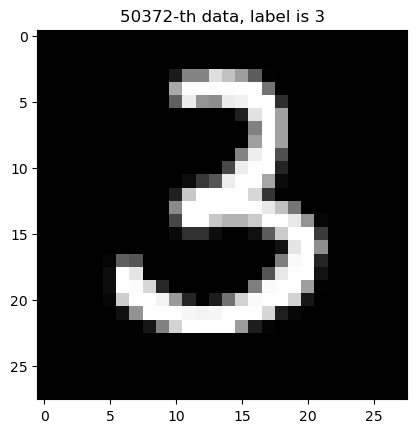

0 255


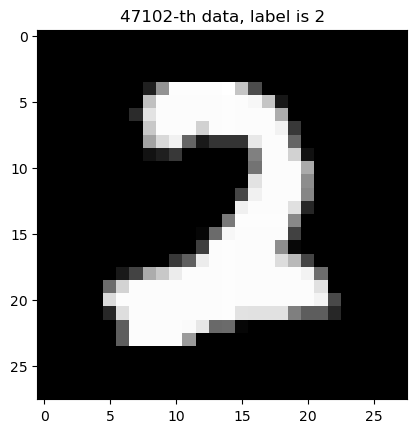

0 255


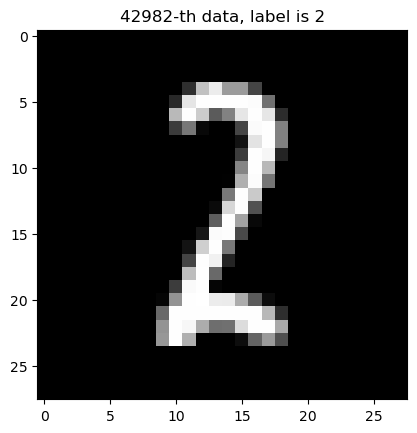

0 255


In [ ]:
# 랜덤 선택된 이미지들 살펴보기
for idx in random_idx:
  img = x_train[idx,:] # 6만개의 train 셋 중, 3개 추출하고, 28*28 사이즈 그대로 가져온다.
  label = y_train[idx] # 선택된 x에 대한 답안인 y를 가져온다.
  plt.imshow(img, cmap='gray')
  plt.title(f'{idx}-th data, label is {label}') # 시각화하는데, 인덱스 번호와 정답값 label을 제목으로 가져온다.
  plt.show()

  # 데이터셋 중 하나의 값 임의로 선택해서
  # min값과 max값 살펴보기 = 회색조로 잘 되었는지, 아니면 rgb값으로 되어있는지 확인
  print(x_train[0].min(), x_train[0].max())

In [ ]:
# 트레인셋을 훈련 - 검증 데이터 셋으로 분리 (7:3)
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

# 분리된 데이터셋 확인
print(x_train.shape, y_train.shape)

(42000, 28, 28) (42000,)


In [ ]:
# 트레인셋, 검증셋 1차원으로 변환 전처리
x_train = (x_train.reshape((-1,28*28)))/255
x_val = (x_val.reshape((-1,28*28)))/255
x_test = (x_test.reshape((-1,28*28)))/255

In [ ]:
# 변환 전처리 후 shape 살펴보기
print('reshape 후의 트레인셋 모양 : ', x_train.shape)
print('reshape 후의 검증셋 모양 : ', x_test.shape)
print('트레인셋의 최대값, 최소값 : ', x_train.min(), x_train.max()) # 최대 1, 최소 0
# print('검증셋의 최대값, 최소값 : ', x_val.min(), y_val.max()) # 최대 1, 최소 0

reshape 후의 트레인셋 모양 :  (42000, 784)
reshape 후의 검증셋 모양 :  (10000, 784)
트레인셋의 최대값, 최소값 :  0.0 1.0


In [ ]:
# y값의 인코딩
# 1, 2, 3, 4, 5.... 형식이기 때문에 y값을 그대로 써도 되지만
# 보통은 원 핫 인코딩으로 변환 후 진행한다. 왜???

from keras.utils import to_categorical # categorical : 범주형을 인코딩해주는 모듈

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print('y_train : ', y_train, 'y_test : ', y_test)

y_train :  [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] y_test :  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential # 시퀀셜 모델 모듈 불러오고
from keras.layers import Dense # 덴스(완결 연결층) 생성 모듈 불러오고

In [ ]:
# 모델 생성

model = Sequential() # 시퀀셜 모델 만들어주고
model.add(Dense(64, input_shape = (784,), activation = 'relu'))
# 64개의 유닛이 있는 중간층을 만들어준다. (각 유닛은 784개의 입력값을 받는다.)
# 가장 첫 번째 층에서는 꼭 input_shape을 적어줘야 한다. (데이터가 어떻게 들어오는지)

model.add(Dense(32, activation = 'relu'))
# 32개의 유닛이 있는 중간층을 추가해 만들어준다.
# 중간에 있는 층은 input / outout shape를 적어주지 않아도 된다.

model.add(Dense(10, activation = 'softmax'))
# 유닛의 수는 10개로 해준다. == 정닶값 y 데이터셋을 원핫인코딩으로 10*n의 행렬로 변환해줬기 때문 
# softmax : 출력값의 전체 합이 1(=100%)이 되는 활성화 함수  ; 추가 공부 필요
# 소프트맥스 함수는 다른 활성화 함수와는 조금 다르게 바라봐야 할 필요가 있을 것 같다... ; 추가 공부 필요

In [ ]:
# 컴파일  
model.compile(optimizer = 'adam',  # 옵티마이저는 아담으로. 아담이 뭘까?
              loss = 'categorical_crossentropy',  # 로스값은 카테고리컬 크로스엔트로피로
              metrics = ['acc'])  # 평가는 정확도로

# 학습
history = model.fit(x_train, y_train, epochs=30, batch_size = 128, validation_data=(x_val, y_val))
## 전체 학습 데이터를 30번 돌릴 것인데.. (ephchs)
## ????(batch_size)
## 검증 데이터는 x_val, y_val

Epoch 1/30


2022-12-11 22:45:26.612035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:45:26.667314: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14af92a60
2022-12-11 22:45:26.667337: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14af92a60
2022-12-11 22:45:26.669887: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14af92a60
2022-12-11 22:45:26.669903: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14af92a60
2022-12-11 22:45:26.671090: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_4' defined at (most recent call last):
    File "/opt/miniconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/miniconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/miniconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/fn/b29w84gs71q01kp51x0ty8h80000gn/T/ipykernel_8482/670372450.py", line 7, in <module>
      history = model.fit(x_train, y_train, epochs=30, batch_size = 128, validation_data=(x_val, y_val))
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/opt/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_4'
could not find registered platform with id: 0x14af92a60
	 [[{{node StatefulPartitionedCall_4}}]] [Op:__inference_train_function_54648]

In [ ]:
# 앞서 학습된 모델의 history에서 출력할 수 있는 값들은?
# dictionary 형태로 저장되어있고
# loss, acc, val_loss, cal_acc 값이 저장되어있다.
print('history에는 무엇무엇이 저장되어 있을까? : ', history.history.keys())

history에는 무엇무엇이 저장되어 있을까? :  dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


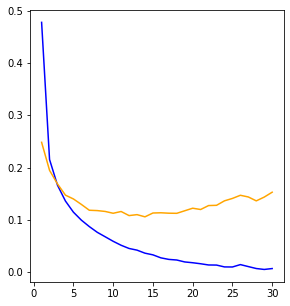

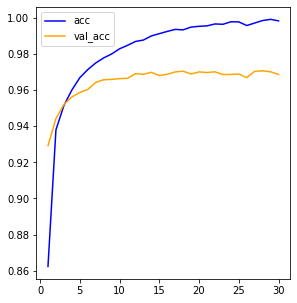

In [ ]:
# 학습 횟수에 따른 각 지표들의 추이 살펴보기 (그래프로)

## 변수들 설정
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
accs = his_dict['acc']
val_accs = his_dict['val_acc']
epochs = range(1, len(loss) + 1) # 학습 횟수. x 축이 된다.

## 그래프 그리기 (1) : loss - val_loss 살펴보기
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 2, 1)  # 2행 1열중 첫 번째 그래프
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss,color='orange', label='val_loss')
### 해석 : 학습(훈련) loss는 계속해서 내려간다 : 그럴 수 밖에 없음 > 같은 데이터를 반복 학습하기 때문
### 해석 : 검증 loss는 감소하다가 증가함 > 증가 = 모델이 학습(훈련) 데이터에 과적합되었음을 알 수 있음

## 그래프 그리기 (2) : acc 살펴보기
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 2, 2)  # 2행 1열중 두 번째 그래프
ax1.plot(epochs, accs, color='blue', label='acc')
ax1.plot(epochs, val_accs,color='orange', label='val_acc')
ax1.legend()
### 해석 : 학습(훈련) acc는 지속 올라가지만, 검증 acc는 증가하다가 보합세를 보인다.
### 학습 acc는 올라가지만 검증 acc는 보합세면 -> 과대적합 우려

In [ ]:
# 모델 평가

model.evaluate(x_test, y_test) # 문제(x)와 답안(y)를 넣어줌.
## 결과값 = loss: 0.1329 - acc: 0.9723
## 정확도 0.9723 으로 꽤 높은 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.1492 - acc: 0.9699


[0.14919409155845642, 0.9699000120162964]

In [ ]:
# 테스트셋에 대한 결과값 살펴보기
result = model.predict(x_test)
print('결과값 형태 : ', result.shape)
## 이는 10000, 10 의 형태인데..
## -> 테스트 데이터가 10,000개였고, 원핫인코딩으로 칼럼이 10개로 분할됨


# 결과값 하나만 살펴보면
print('결과값 하나만 보기(10개의 답안 중 각각 에 대한 선택율) : ', result[0])
print('결과값 하나만 보기(선택율을 반올림) : ', np.round(result[0],2))
print('결과값 하나만 보기(선택율이 가장 높은 값은?) : ', np.argmax(result[0])) # argmax : 배열에서 가장 큰 값이 있는 열의 index 값을 반환

313/313 [==============================] - 1s 2ms/step
결과값 형태 :  (10000, 10)
결과값 하나만 보기(10개의 답안 중 각각 에 대한 선택율) :  [2.78815029e-16 7.20946587e-15 1.40222495e-11 1.96156989e-07
 1.36037348e-20 1.43458582e-14 5.24226282e-30 9.99999702e-01
 2.34867193e-13 2.73012027e-13]
결과값 하나만 보기(선택율을 반올림) :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
결과값 하나만 보기(선택율이 가장 높은 값은?) :  7


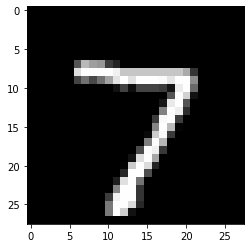

In [ ]:
# 결과값을 그래프로 찍어보기
plt.imshow(x_test[0].reshape(28,28), cmap='gray') # 7이 나옴

1/1 [==============================] - 0s 20ms/step
예측값 :  3


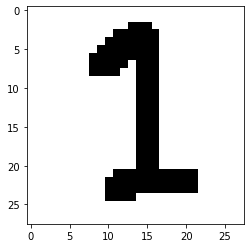

1/1 [==============================] - 0s 18ms/step
예측값 :  3


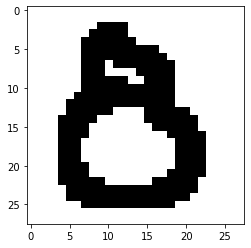

1/1 [==============================] - 0s 20ms/step
예측값 :  9


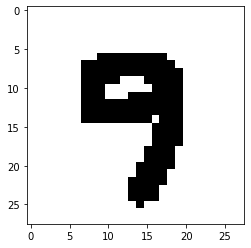

1/1 [==============================] - 0s 26ms/step
예측값 :  5


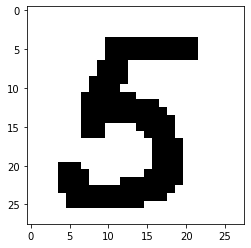

1/1 [==============================] - 0s 23ms/step
예측값 :  3


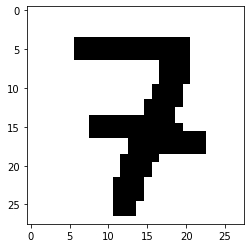

1/1 [==============================] - 0s 17ms/step
예측값 :  2


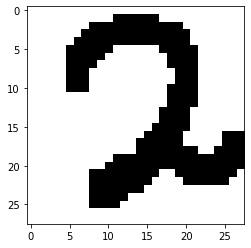

1/1 [==============================] - 0s 18ms/step
예측값 :  9


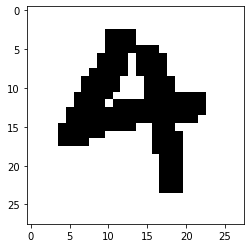

1/1 [==============================] - 0s 17ms/step
예측값 :  3


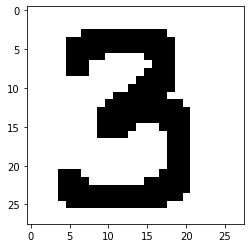

1/1 [==============================] - 0s 16ms/step
예측값 :  1


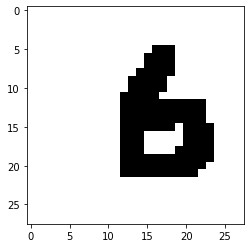

1/1 [==============================] - 0s 17ms/step
예측값 :  9


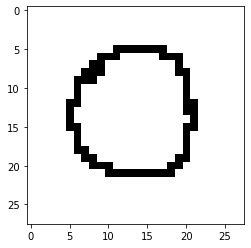

In [ ]:
# 그러면.. 이전에 만들었던 내 손글씨 이미지를 불러와, 모델이 어떤 숫자로 인식할지 테스트해보자
# @ 솔형님 : 0~9 숫자를 그림판으로 그려주세요
# @ 솔형님 : 이때, 이미지 크기는 28 * 28이어야 합니다!
# @ 솔형님 : 이후, 구글드라이브에 올려준 후
# @ 솔형님 : 아래쪽 glob.glob(경로명) 경로명 안에 이미지 올라간 경로 올려주시면 됩니다.
# @ 솔형님 : *.확장자 -> '확장자명에 해당하는 모든 파일' 이라는 뜻입니다.

from PIL import Image
import glob

pred_list = []

for path in glob.glob('/content/drive/MyDrive/Colab Notebooks/data/img/*.bmp'):
    img = Image.open(path).convert('L') # L : 흑백 / L 삭제하면 기본값인 RGB로 표현됨
    plt.imshow(img, cmap='gray')

    img = np.resize(img, (1, 784))      # 1, 784 형태의 array로 바꿈
    img = 255.0 - (img)                   # 색상 반전
    pred = model.predict(img)       # 모델을 통해 예측함
    print('예측값 : ', np.argmax(pred))
    
    pred_list.append(pred)
    plt.show()


In [ ]:
# 학습시킨 모델 저장과 불러오기

## 모델 저장
model.save('mnist.h5') #확장자가 h5이다.

## 모델 불러오기
from keras.models import load_model
new_model = load_model('mnist.h5')

## 불러온 모델 이용해 예측하기
np.argmax(new_model.predict(x_test)[0])
print(x_test[0])

313/313 [==============================] - 1s 2ms/step
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

In [ ]:
# 학습시킨 모델의 weight(가중치)값 저장과 불러오기

## 가중치 값 저장
model.save_weights('mnist')

## 저장된 가중치 값을 적용시킬 모델 생성하기
model1 = Sequential()
model1.add(Dense(64, input_shape = (784,), activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

## 가중치 값 불러와 새로운 모델에 적용시키기
model1.load_weights('mnist')

## 불러온 모델 이용해 예측하기
np.argmax(model1.predict(x_test)[0])
print(x_test[0])

313/313 [==============================] - 1s 1ms/step


7

### 위 학습 모델의 의의

* 위 학습 모델은 '가중치'를 학습했다는 것에 의의가 있다.  
* '모델 = 가중치 주는 방식' 과 같다고 봐도 되겠다.  

# 12/12 수업

## 신경망 만들어보기 - 의류 품목 인식


### 데이터 설명

* 의류 품목 사진정보와 어떠한 분류인지 label이 함께 있는 데이터셋이다. 
* 데이터 총 개수는 7만개, train set 60000개와 test set 10000개가 있다.
* x데이터 (의류사진) 은 28 * 28 배열 형태로 되어 있고
* y데이터 (분류값=label)은 의류종류 10개가 0 ~ 9 라는 정수값으로 인코딩되어있다.

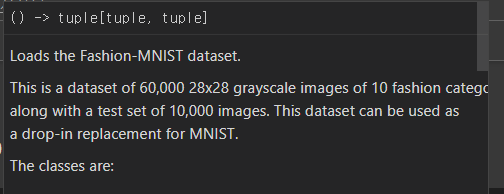

In [2]:
# 케라스에서 데이터셋 불러오기
from keras.datasets.fashion_mnist import load_data

In [3]:
# 트레인, 테스트셋으로 분리
# 이후 분리 확인
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


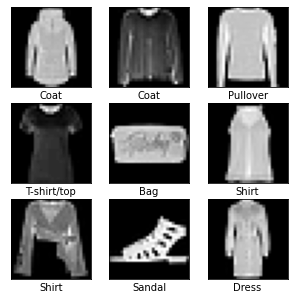

x의 min값 : 0, x의 max값 : 255
y값 : [4 4 2 0 8 6 6 5 3]


In [4]:
# 데이터의 x, y 살펴보기

import matplotlib.pyplot as plt
import numpy as np

## 난수 생성 방식을 777번으로 고정
np.random.seed(777)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

sample_size = 9
random_idx = np.random.randint(0, 60000, size=sample_size)

# x값 그려보기
plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)  # 3 * 3 형태의 subplot을 가진 plot 그리기. 마지막 파라미터는 몇번째로 나올지 (행부터 채움)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])

plt.show()

# x의 min, max 값 살펴보기
print(f'x의 min값 : {x_train.min()}, x의 max값 : {x_train.max()}')

# y값 출력해보기
print(f'y값 : {y_train[random_idx]}')

### 데이터 전처리, 검증데이터셋 나누기

In [5]:
# x값을 작게 만들어주기
## 딥러닝에서는 숫자 크기에 의해 결과가 크게 좌지우지된다.
## 그러므로 레이블 인코딩보다 원-핫 인코딩을 선호하는 것이다.
## 레이블값 뿐만 아니라, 입력되는 데이터의 크기에도 영향을 받을 수 있기 때문에
## 입력값 또한 그 크기를 작게 해주는 것이 좋다.

x_train = x_train/255
x_test = x_test/255

print(f'변환 후 x의 min값 : {x_train.min()}, x의 max값 : {x_train.max()}')

# y값을 원-핫 인코딩 해주기
# 정수값에 의해 영향을 받을 수 있기 때문
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'변환 후 y값 : {y_train[random_idx]}')

변환 후 x의 min값 : 0.0, x의 max값 : 1.0
변환 후 y값 : [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
# 잠깐 다른 거 설명 : spares_categorical_crossentropy
# 0 ~ 9라는 값이 있다면 -> 이를 총 합이 1이 되는 값으로 비율 변환을 해줌

In [7]:
# 검증용 데이터셋 만들기 (분리)
## train, test 데이터는 있지만, 학습에 함께 쓰일 검증용 데이터는 없는 상태
## 때문에, train 데이터셋을 실제 학습용과 검증용으로 나눈다. (7:3)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state=777)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(42000, 28, 28) (42000, 10) (18000, 28, 28) (18000, 10)


### 모델 생성 및 학습 (1번 모델, 2번 모델)

In [8]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
# Dense : 완결연결층. 앞쪽 신호와 현재층 유닛이 서로 모두 연결
# Flatten : 이름에서 알 수 있다시피 펼쳐주는 것. 1차원으로 펼쳐주는 것이다.
# 현재 데이터셋이 (28,28)의 배열 형태임에 따라 1차원으로 펼치는 작업이 필요한데,
# Flatten 상황(층의 상황 등을 고려)에 따라 데이터 shape을 펼치거나 그대로 두거나 하여
# 학습에 적합하도록 바꿔준다. (전처리 필요 없어서 편함)
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import keras.metrics

In [9]:
# 1번 모델 생성
first_model = Sequential()

# 모델에 레이어 추가
## Flatten은 펼쳐주는 층이므로, 데이터를 처음 입력받는 층이 될 경우 따로 유닛 수를 제시할 필요가 없다.
## 이후 Dense층 두 개, output층은 label 분류 개수에 맞게 10개 유닛, 출력은 softmax로 한다. 
first_model.add(Flatten(input_shape=(28,28)))
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))

# 모델 컴파일
## 옵티마이저는 보편적으로 사용하는 Adam
## 원 핫 인코딩같이 다중분류일 경우 loss 는 categirucal_crossentropy
## 평가지표는 acc 정확도로
first_model.compile(optimizer = Adam(),
                    loss = categorical_crossentropy,
                    metrics = ['acc'])

# 모델 요약 보기
first_model.summary()
## 첫 층에서 Param(학습할 파라미터)는 총 50,240개, 유닛별 785개 : 784개 데이터의 가중치 + bias 1개
## 두 번째 층에서 학습할 Param은 2080개, 유닛별 65개 : 이전 층 유닛이 64개이므로 신호는 64개. 즉 64개 가중치와 + bias 1개
## 세 번째 층에서 학습할 Param은330개, 유닛별 33개 : 이전 층 유닛 32개 입력신호의 가중치 + bias 1개

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습시키기
## history로 학습 내용을 받는다.
## epoch = 30 : 전체 데이터를 30회 반복하고
## batch_size : 한 번에 읽어올 데이터 수. 한 번에 많은 내용을 받아오기 힘들기 때문에 batch_size를 나눈다.
## 이는 컴퓨터 메모리의 한계와도 연결되는데, 메모리에 여유가 있다면 배치 사이즈를 크게 가져가거나 설정하지 않아도 된다.
## 검증용 데이터 val 셋들로 학습과 함께 검증한다.  


first_history = first_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6631 - acc: 0.7751 - val_loss: 0.4624 - val_acc: 0.8391
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4361 - acc: 0.8472 - val_loss: 0.4030 - val_acc: 0.8594
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3935 - acc: 0.8581 - val_loss: 0.4168 - val_acc: 0.8534
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3709 - acc: 0.8669 - val_loss: 0.3750 - val_acc: 0.8661
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3491 - acc: 0.8734 - val_loss: 0.3702 - val_acc: 0.8674
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3317 - acc: 0.8775 - val_loss: 0.3651 - val_acc: 0.8706
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3243 - acc: 0.8807 - val_loss: 0.3441 - val_acc: 0.8787
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [11]:
# 2번 모델 생성

second_model = Sequential()

# 모델에 레이어 추가
## 두 번째 모델에서는 층 하나를 더 추가한다. (128개 유닛, relu)
## 그 외는 모두 동일하다.
second_model.add(Flatten(input_shape=(28,28)))
second_model.add(Dense(128, activation = 'relu'))
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))

# 모델 컴파일
second_model.compile(optimizer = Adam(),
                    loss = categorical_crossentropy,
                    metrics = ['acc'])

# 모델 요약 보기
second_model.summary()
## 첫 층 학습할 Param 총 100,480개, 유닛별 785개
## 두 번째 층에서 학습할 Param 총 8,256개, 유닛별 129개 : 784개 데이터의 가중치 + bias 1개
## 세 번째 층에서 학습할 Param 총 2,080개, 유닛별 65개 : 이전 층 유닛이 64개이므로 신호는 64개. 즉 64개 가중치와 + bias 1개
## 네 번째 층에서 학습할 Param 총 330개, 유닛별 33개 : 이전 층 유닛 32개 입력신호의 가중치 + bias 1개

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습시키기
## history로 학습 내용을 받는다.
## epoch = 30 : 전체 데이터를 30회 반복하고
## batch_size : 한 번에 읽어올 데이터 수. 한 번에 많은 내용을 받아오기 힘들기 때문에 batch_size를 나눈다.
## 이는 컴퓨터 메모리의 한계와도 연결되는데, 메모리에 여유가 있다면 배치 사이즈를 크게 가져가거나 설정하지 않아도 된다.
## 검증용 데이터 val 셋들로 학습과 함께 검증한다.  

second_history = second_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6320 - acc: 0.7847 - val_loss: 0.4724 - val_acc: 0.8392
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4176 - acc: 0.8518 - val_loss: 0.4236 - val_acc: 0.8488
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3746 - acc: 0.8643 - val_loss: 0.3916 - val_acc: 0.8592
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3463 - acc: 0.8746 - val_loss: 0.3621 - val_acc: 0.8702
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3271 - acc: 0.8798 - val_loss: 0.3596 - val_acc: 0.8687
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3112 - acc: 0.8858 - val_loss: 0.3303 - val_acc: 0.8797
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2958 - acc: 0.8904 - val_loss: 0.3233 - val_acc: 0.8828
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

### 모델 비교

In [16]:
# 두 모델의 학습 결과 비교해보기 : 그래프로 비교하는 함수 지정

def draw_loss_acc(history1, history2, epochs):
  import numpy as np
  import matplotlib.pyplot as plt
  his_dict_1 = history1.history # 첫 모델의 history 저장. history는 사전 형태로 나온다.
  his_dict_2 = history2.history # 두 번째 모델의 history 저장
  keys = list(his_dict_1.keys()) # dict의 키값 받아오고
  epochs = range(1, epochs) # 학습횟수 변수 만들고

  # 그래프 설정
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

  # 그래프 그리기
  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1) # plot에 추가할 subplot 설정 (2행 2열 plot 중 i번째)
    temp = keys[i%2]
    # i값을 2로 나눈 후 나머지를 구하면 i = [0, 1, 2, 3] 일때 값 = [0, 1, 0, 1]이 된다.
    val_temp = keys[(i+2)%2 + 2]
    # i = [0, 1, 2, 3]일때 값 = [2, 3, 2, 3]가 된다.
    # -> 기억해두기
    temp_history = his_dict_1 if i <2 else his_dict_2
    # temp_history : 어떤 dict를 받아올지 구간별로 정함
    temp_ax.plot(epochs, temp_history[temp][1:], color='blue', label='train_'+temp) # 0,1 즉 train의 그래프. x축에는 epochs, y축에는 history의 값을 넣음
    temp_ax.plot(epochs, temp_history[val_temp][1:], color='orange', label='val_'+temp) # 2,3 즉 val의 그래프

    if(i==1 or i==3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start,2),end,0.01))

    temp_ax.legend()

  ax.set_ylabel('loss', size=20, labelpad=20)
  ax.set_xlabel('Epochs', size=20, labelpad=20)
  plt.tight_layout()
  plt.show()
  # 이 윗부분 공부하기


In [ ]:
# 두 모델 비교하기
draw_loss_acc(first_history, second_history, 30)

## 두 모델 중에서는 첫 번째 모델을 사용하는 게 좋고
## 본 딥러닝 모델은 이미지 비교에는 적합하지 않다는 것을 알 수 있다.

### 모델 평가 및 테스트

In [18]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# import
from PIL import Image
import numpy as np

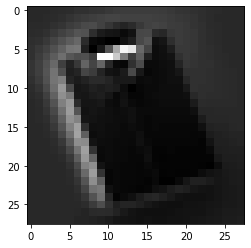

(28, 28)


(None, None)

In [40]:
# 이미지 불러오기 및 전처리

imgname = 'shirt'

img = Image.open(f'/content/drive/MyDrive/Colab Notebooks/data/img/{imgname}.jpg')
img = img.convert('L') # 이비지를 흑백으로 변환
img = img.resize((28,28)) # 이미지를 28 * 28 사이즈로 변환

img = np.array(img) # 이미지를 행렬 형태로 변환
img = (255-img)/255 # 흑백 반전 및 숫자의 스케일 작게 가져가기

plt.imshow(img, cmap='gray')
plt.show(), print(img.shape)

In [41]:
result = first_model.predict(img.reshape(-1,28,28))
## reshape 이유 : 모델은 (n , 28, 28)의 데이터 형태로, 갯수, 데이터형태가 한꺼번에 나왔다.
## 때문에, 이번에 한 장의 사진(데이터shape : (28,28))만 분석할 때에도 동일한 데이터 형태로 만들어줘야 한다.

print(class_names[result.round(2).argmax()])
## 황조롱이가 가방이었다니..
## 신발을 넣어도 셔츠로 나옴
## 셔츠를 넣었더니 가방으로 나오네

1/1 [==============================] - 0s 19ms/step
Bag


## 신경망 만들어보기 - 보스턴 주택 가격 예측 (회귀)

### 데이터 설명


리턴 형태 : (x_train, y_train), (x_test, y_test)

In [42]:
from keras.datasets.boston_housing import load_data

In [45]:
# 데이터 불러오기 및 살펴보기
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [46]:
# 
mean = np.mean(x_train)
std = np.std(x_train)

x_train = (x_train-mean)/std
x_test = (x_test-mean)/std


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size = 0.33,
                                                  random_state=777)

In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
# 모델 생성 및 컴파일
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # 회귀는 최종 출력값이 1개임, 활성화 함수 없이 그대로 출력하면 됨

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mae'])

In [58]:
# 모델 학습
history = model.fit (x_train, y_train, epochs = 300, validation_data = (x_val, y_val))

# 모델 평가
model.evaluate(x_test, y_test)

Epoch 1/300
9/9 [==============================] - 0s 20ms/step - loss: 44.7063 - mae: 4.5886 - val_loss: 39.5313 - val_mae: 4.1337
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 45.3855 - mae: 4.3530 - val_loss: 39.5640 - val_mae: 4.1116
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 45.0125 - mae: 4.6518 - val_loss: 39.4106 - val_mae: 4.3119
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 44.9467 - mae: 4.4661 - val_loss: 39.5302 - val_mae: 4.1083
Epoch 5/300
9/9 [==============================] - 0s 14ms/step - loss: 44.5111 - mae: 4.5378 - val_loss: 39.2618 - val_mae: 4.2037
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 44.2913 - mae: 4.6022 - val_loss: 39.1587 - val_mae: 4.1634
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 44.1360 - mae: 4.3664 - val_loss: 39.4587 - val_mae: 4.0990
Epoch 8/300
9/9 [==============================] - 0s 12ms/step - loss: 44.1

[31.90744972229004, 3.887535810470581]

### K Fold 검증

In [61]:
from keras.datasets.boston_housing import load_data
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold

In [63]:
# 데이터 불러오기 및 살펴보기
(x_train, y_train), (x_test, y_test) = load_data(seed=777)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 데이터셋 분리

mean = np.mean(x_train)
std = np.std(x_train)

x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

# K폴드 생성
k = 3
kfold = KFold(n_splits=k, shuffle=True, random_state=777)

# 모델 생성 함수 만들기
def get_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1)) # 회귀는 최종 출력값이 1개임, 활성화 함수 없이 그대로 출력하면 됨

  model.compile(optimizer = 'adam',
                loss = 'mse',
                metrics = ['mae'])
  return model

mae_list = []
for train_index, val_index in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
  model = get_model()
  model.fit(x_train_fold, y_train_fold, validation_data = (x_val_fold, y_val_fold))
  _,test_mae = model.evaluate(x_test, y_test)   # _, 이건 뭐지?
  mae_list.append(test_mae)


(404, 13) (404,) (102, 13) (102,)
4/4 [==============================] - 0s 3ms/step - loss: 610.2253 - mae: 22.9878


In [65]:
print(f'mae : {mae_list}')
print(f'mae 평균 : {np.mean(mae_list)}')

mae : [23.305675506591797, 22.818058013916016, 22.98784828186035]
mae 평균 : 23.037193934122723


## 신경망 만들어보기 : 다중 레이블

교재 페이지 121 ~

### 다중 레이블이란?
- 다중 클래스에서 여러 개를 선택하는 문제를 뜻함

### 데이터 설명

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# 데이터 불러오기

# 폴더 만들기
!mkdir /clothes_dataset

# 압축파일 압축 풀기
## 해당 폴더를 압축을 풀어 ./clothes_dataset 폴더에 압축 풀기
!unzip '/content/drive/MyDrive/Colab Notebooks/data/clothes_dataset.zip' -d ./clothes_dataset

## content 폴더는 세션이 종료되면 그 안의 내용은 삭제된다.
## 그러므로, content 내에 만든 데이터는 이번 세션이 끝나면 삭제됨을 유의

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./clothes_dataset/brown_shoes/30ef20bcb027c99409c81fd6127957502b0e693e.jpg  
  inflating: ./clothes_dataset/brown_shoes/312cf581fd4ec3678b8794f9f488aa1dad2f2908.jpg  
  inflating: ./clothes_dataset/brown_shoes/337a443bf71b424c5ff4bfa06bdfcc2a447f9535.jpg  
  inflating: ./clothes_dataset/brown_shoes/33a20d631a24cdd66b4a52d70029bd2037451a96.jpg  
  inflating: ./clothes_dataset/brown_shoes/343de6c46da4b0d867fed16827862cee5cb44fd5.jpg  
  inflating: ./clothes_dataset/brown_shoes/347cd771581ffc1c7fe7049e1823d5282361bc3f.jpg  
  inflating: ./clothes_dataset/brown_shoes/3550f40e92ae504615c57053b64221dafcfe178e.jpg  
  inflating: ./clothes_dataset/brown_shoes/3568f3e842d58733319fdd038dbb5cf50d63f7b3.jpg  
  inflating: ./clothes_dataset/brown_shoes/35c9001c72e8db467dcb8956e421aa5aca756da6.jpg  
  inflating: ./clothes_dataset/brown_shoes/36e76c0fea3e36e4495eb1652b2d287c698a7878.jpg  
  inflating: ./clothes_dataset/brown_shoes/3762df64de73b98c9690f

압축을 풀어보면, 폴더명이 label인 폴더 안에 label에 해당하는 이미지들이 들어가있다.

먼저, 자료를 정리해야 하는 게 1차 목표이다,

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob as glob
import cv2

all_data = np.array(glob.glob('/content/clothes_dataset/*/*.jpg', recursive=True))
## 모든 이미지 파일을 어레이에 저장

# 색과 옷의 종류를 구별하기 위해 해당되는 label에 1을 삽입합니다.
def check_cc(color, clothes):
    labels = np.zeros(11,)
    ## 라벨이 될 어레이를 원-핫 인코딩된 형식으로 만들어주고
    
    # color check
    ## 컬러에 해당하면 해당 순서에 1값 넣기
    if(color == 'black'):
        labels[0] = 1
        color_index = 0
    elif(color == 'blue'):
        labels[1] = 1
        color_index = 1
    elif(color == 'brown'):
        labels[2] = 1
        color_index = 2
    elif(color == 'green'):
        labels[3] = 1
        color_index = 3
    elif(color == 'red'):
        labels[4] = 1
        color_index = 4
    elif(color == 'white'):
        labels[5] = 1
        color_index = 5
        
    # clothes check
    ## 옷 종류에 해당하면 해당 순서에 1값 넣기
    if(clothes == 'dress'):
        labels[6] = 1
    elif(clothes == 'shirt'):
        labels[7] = 1
    elif(clothes == 'pants'):
        labels[8] = 1
    elif(clothes == 'shorts'):
        labels[9] = 1
    elif(clothes == 'shoes'):
        labels[10] = 1
        
    return labels, color_index

# label과 color_label을 담을 배열을 선언합니다.
all_labels = np.empty((all_data.shape[0], 11))
all_color_labels = np.empty((all_data.shape[0], 1))
## 모든 데이터에 대한 라벨 어레이. 이전에 진행했었던 것의 y에 해당한다.

# print(all_data[0])
for i, data in enumerate(all_data):
    color_and_clothes = all_data[i].split('/')[-2].split('_')
    ## 폴더 이름에서 컬러와 옷 종류를 추출함

    color = color_and_clothes[0]
    clothes = color_and_clothes[1]
    # print(color,clothes)
    ## 폴더 이름에서 컬러와 옷 종류를 각각 추출함
    
    labels, color_index = check_cc(color, clothes)
    all_labels[i] = labels
    all_color_labels[i] = color_index
    
all_labels = np.concatenate((all_labels, all_color_labels), axis = -1)
## 컬러와 옷 종류에 대한 레이블값을 수평으로 붙임

In [15]:
all_data

array(['/content/clothes_dataset/red_shoes/57007b1e36f9b86f2832005bf20de8d3fe12b518.jpg',
       '/content/clothes_dataset/red_shoes/5e006b1eab73efeaa91fb76aa7c2d6e24706e60f.jpg',
       '/content/clothes_dataset/red_shoes/c23f9fcb3caebad169fd4b671cf71fd196fed7e3.jpg',
       ...,
       '/content/clothes_dataset/blue_shirt/83c86d0baf7782dc40aced68d451ad835bce930c.jpg',
       '/content/clothes_dataset/blue_shirt/7b0dae0a9bd09af24390c50089e14ed5874c060c.jpg',
       '/content/clothes_dataset/blue_shirt/c93ff1693d6d827ff4262c7bcf24c0d44ce397be.jpg'],
      dtype='<U82')

In [19]:
from sklearn.model_selection import train_test_split

# 훈련, 검증, 테스트 데이터셋으로 나눕니다.
train_x, test_x, train_y, test_y = train_test_split(all_data, all_labels, shuffle = True, test_size = 0.3,
                                                   random_state = 99)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, shuffle = True, test_size = 0.3,
                                                 random_state = 99)

In [20]:

train_df = pd.DataFrame({'image':train_x, 'black':train_y[:, 0], 'blue':train_y[:, 1],
                        'brown':train_y[:, 2], 'green':train_y[:, 3], 'red':train_y[:, 4],
                        'white':train_y[:, 5], 'dress':train_y[:, 6], 'shirt':train_y[:, 7],
                        'pants':train_y[:, 8], 'shorts':train_y[:, 9], 'shoes':train_y[:, 10],
                        'color':train_y[:, 11]})

val_df = pd.DataFrame({'image':val_x, 'black':val_y[:, 0], 'blue':val_y[:, 1],
                        'brown':val_y[:, 2], 'green':val_y[:, 3], 'red':val_y[:, 4],
                        'white':val_y[:, 5], 'dress':val_y[:, 6], 'shirt':val_y[:, 7],
                        'pants':val_y[:, 8], 'shorts':val_y[:, 9], 'shoes':val_y[:, 10],
                        'color':val_y[:, 11]})

test_df = pd.DataFrame({'image':test_x, 'black':test_y[:, 0], 'blue':test_y[:, 1],
                        'brown':test_y[:, 2], 'green':test_y[:, 3], 'red':test_y[:, 4],
                        'white':test_y[:, 5], 'dress':test_y[:, 6], 'shirt':test_y[:, 7],
                        'pants':test_y[:, 8], 'shorts':test_y[:, 9], 'shoes':test_y[:, 10],
                        'color':test_y[:, 11]})

In [21]:
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes,color
0,/content/clothes_dataset/green_shorts/e74d11d3...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,/content/clothes_dataset/black_dress/f1be32393...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,/content/clothes_dataset/black_shoes/04f78f68a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/content/clothes_dataset/brown_pants/0671d132b...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,/content/clothes_dataset/white_shoes/59803fb01...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


In [22]:
# csv파일로 트레인셋 저장

## 저장할 디렉토리 만들어주고
!mkdir csv_data

## csv로 저장
train_df.to_csv('/content/csv_data/train.csv', index=False)
test_df.to_csv('/content/csv_data/test.csv', index=False)
val_df.to_csv('/content/csv_data/val.csv', index=False)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
# 훈련 데이터 만들기
## 불러온 이미지를 255로 나누는 스케일링 하는 훈련 데이터 만들기 변수
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 알맞는 배치 사이즈 찾는 함수 생성
def get_steps(num_sampels, batch_size):
  if (num_sampels % batch_size) > 0:
    # 배치 사이즈로 데이터를 나누려 하는데,
    # 전체 데이터가 배치 사이즈로 나누어지지 않으면 이라는 if
    return (num_sampels // batch_size) + 1
  else:
    return (num_sampels // batch_size)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [30]:
# 모델 만들기
model = Sequential()
model.add(Flatten(input_shape=(112,112,3)))
## input shape : 112 * 112 이미지 크기에 컬러이므로 RGB값 (3차원)
## 때문에 (112, 112, 3) 차원이 된다.

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))
## 마지막 층은 레이블의 분류 개수와 동일해야 함 즉 11개
## 마지막 활성화 함수는 2개 이상이 선택될 수 있는 다중 레이블 문제이므로
## 활성화 함수는 시그모이드를 사용한다. (소프트맥스는 둘 중 하나 선택 문제에 해당)

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['binary_accuracy'])
## loss : binary_crossentropy :
## metrics : binary_accuracy : 

In [27]:
# 모델 살펴보기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37632)             0         
                                                                 
 dense (Dense)               (None, 128)               4817024   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 4,825,995
Trainable params: 4,825,995
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 학습 전 준비
batch_size = 32
class_col =['black', 'blue', 'brown', 'green', 'red', 'white', 'dress','shirt', 'pants', 'shorts', 'shoes']

# 트레이닝 데이터 생성
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='image',
                                                    y_col=class_col,
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode='raw',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=42)

# 검증 데이터 생성
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                    x_col='image',
                                                    y_col=class_col,
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode='raw',
                                                    batch_size=batch_size,
                                                    shuffle=True
                                                 )

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [31]:
model.fit(train_generator,
          steps_per_epoch=get_steps(len(train_df),batch_size), 
          validation_data=val_generator,
          validation_steps=get_steps(len(val_df),batch_size),
          epochs = 10)

Epoch 1/10
175/175 [==============================] - 30s 159ms/step - loss: 0.5587 - binary_accuracy: 0.8411 - val_loss: 0.3170 - val_binary_accuracy: 0.8826
Epoch 2/10
175/175 [==============================] - 31s 179ms/step - loss: 0.2835 - binary_accuracy: 0.8871 - val_loss: 0.2811 - val_binary_accuracy: 0.8906
Epoch 3/10
175/175 [==============================] - 29s 165ms/step - loss: 0.2628 - binary_accuracy: 0.8957 - val_loss: 0.2554 - val_binary_accuracy: 0.8979
Epoch 4/10
175/175 [==============================] - 28s 159ms/step - loss: 0.2307 - binary_accuracy: 0.9075 - val_loss: 0.2455 - val_binary_accuracy: 0.9034
Epoch 5/10
175/175 [==============================] - 28s 158ms/step - loss: 0.2319 - binary_accuracy: 0.9089 - val_loss: 0.2306 - val_binary_accuracy: 0.9107
Epoch 6/10
175/175 [==============================] - 29s 168ms/step - loss: 0.2168 - binary_accuracy: 0.9153 - val_loss: 0.2121 - val_binary_accuracy: 0.9202
Epoch 7/10
175/175 [==========================

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                    x_col='image',
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode=None,
                                                    batch_size=batch_size,
                                                    shuffle=False
                                                 )

preds = model.predict(test_generator,steps=get_steps(len(test_df),batch_size),verbose=1)

Found 3416 validated image filenames.
107/107 [==============================] - 15s 137ms/step


In [33]:
np.round(preds[0],2)

array([0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  ],
      dtype=float32)

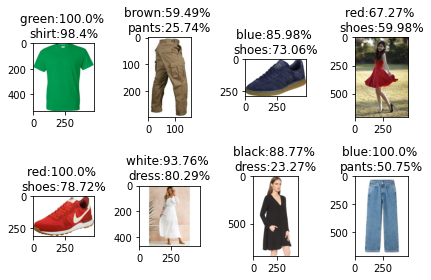

In [34]:
import matplotlib.pyplot as plt

do_preds = preds[:8]
for i ,pred in enumerate(do_preds):
  plt.subplot(2,4,i+1)
  prob = zip(class_col,list(pred))
  # print(list(prob))
  prob = sorted(list(prob),key=lambda x:x[1],reverse=True)
  # print(prob)
  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f'{prob[0][0]}:{round(prob[0][1]*100,2)}% \n{prob[1][0]}:{round(prob[1][1]*100,2)}%')
plt.tight_layout()
plt.show()

In [44]:
# 새로운 이미지로 predict 해보기

## 구글드라이브에 predict할 이미지 올려둔 뒤
## directory 쪽에 이미지 올려둔 폴더를 지정해주세요.

data_datagen = ImageDataGenerator(rescale = 1./255)
data_generator = data_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/data/clothes_img',
    target_size = (112, 112),
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle = False
)

result = model.predict(data_generator,steps=get_steps(2,batch_size),verbose=1)
## 2개의 이미지 예측

Found 0 images belonging to 0 classes.


ValueError: ignored

In [ ]:
# 정답값 보기

np.round(result,2)

In [ ]:
for i ,pred in enumerate(result):
  prob = zip(class_col,list(pred))
  prob = sorted(list(prob),key=lambda x:x[1],reverse=True)